# Iris data

In [54]:
import warnings
from tqdm import tqdm

### Data import

In [1]:
Iris_path = 'D:/OneDrive - 연세대학교 (Yonsei University)/Lectures/2022-2_모빌리티데이터분석및활용/dataset/Iris_dataset.csv'

In [2]:
import pandas as pd
Iris = pd.read_csv(Iris_path)
Iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
# Generating unlabeled data
X = Iris[['petal.length', 'petal.width']]
X

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Plot data with respect to petal

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

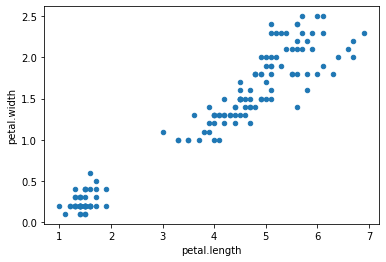

In [4]:
X.plot.scatter(x = 'petal.length', y = 'petal.width')

### Clustering (K-means)
- Number of cluster = 3

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3,
           init = 'random',
           n_init = 10,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)

y_km = km.fit_predict(X)
y_km

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
# Add the result(y_km) to Iris dstaset
import numpy as np

Iris['y_km'] = y_km.tolist()
Iris

,sepal.length,sepal.width,petal.length,petal.width,variety,y_km
0,5.1,3.5,1.4,0.2,Setosa,2
1,4.9,3.0,1.4,0.2,Setosa,2
2,4.7,3.2,1.3,0.2,Setosa,2
3,4.6,3.1,1.5,0.2,Setosa,2
4,5.0,3.6,1.4,0.2,Setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0
146,6.3,2.5,5.0,1.9,Virginica,0
147,6.5,3.0,5.2,2.0,Virginica,0
148,6.2,3.4,5.4,2.3,Virginica,0


<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

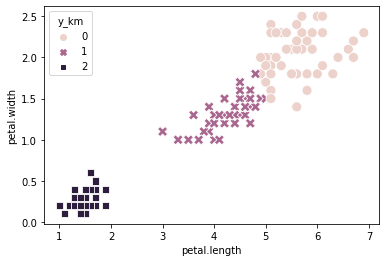

In [7]:
# Plot the results by the clusters
import seaborn as sns
sns.scatterplot(x = 'petal.length', y = 'petal.width', hue = 'y_km', style = 'y_km', s = 100, data = Iris)

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

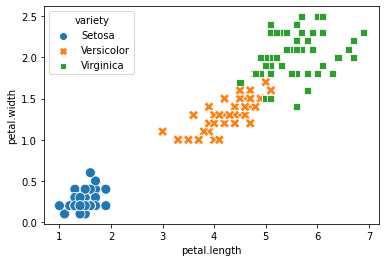

In [8]:
# Comparision with the true data
sns.scatterplot(x = 'petal.length', y = 'petal.width', hue = 'variety', style = 'variety', s = 100, data = Iris)

### Elbow method (K-means)

In [9]:
# Reporting SSE
print(km.inertia_)

31.371358974358966


In [51]:
warnings.filterwarnings(action = 'ignore')

# Evaluating SSEs by increasing the number of clusters
distortions = []

for i in range(1,11):
    
    km = KMeans(n_clusters = i,
               init='random',
               n_init = 10,
               max_iter = 300,
               random_state = 0)
    km.fit(X)
    
    distortions.append(km.inertia_)

distortions

[152840.0778704412,
 64391.15039586971,
 36164.742698778144,
 28638.249226939333,
 22083.718488072853,
 17943.239460241188,
 15050.72438526969,
 11671.553808787936,
 10367.094728076552,
 8891.105326072862]

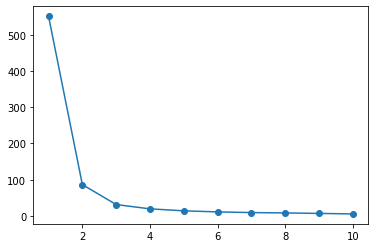

In [11]:
# Ploting the SSEs
import matplotlib.pyplot as plt
plt.plot(range(1, 11), distortions, marker = 'o')

### Silhouette analysis (K-means)

- k=2

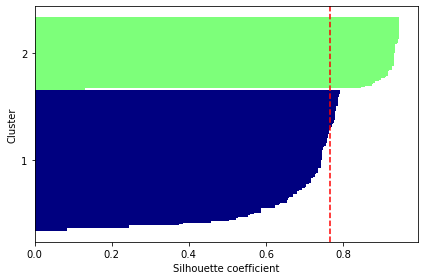

In [12]:
# Clustering
km = KMeans(n_clusters = 2,
           init = 'random',
           n_init = 10,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)

y_km = km.fit_predict(X)

# Evaluating silhouette coefficients
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

# Ploting
from matplotlib import cm

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height = 1.0,
             edgecolor = 'none',
             color = color)
    
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

# Ploting average of silhouette coefficients
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color = "red",
           linestyle = "--")

# Layout
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

- K = 3

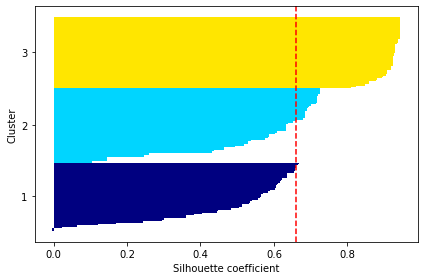

In [13]:
# Clustering
km = KMeans(n_clusters = 3,
           init = 'random',
           n_init = 10,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)

y_km = km.fit_predict(X)

# Evaluating silhouette coefficients
from sklearn.metrics import silhouette_samples
silhouette_vals=silhouette_samples(X,y_km,metric='euclidean')

# Ploting
from matplotlib import cm
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

# Ploting average of silhouette coefficients
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color="red",
           linestyle="--")

# Layout
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show() # 3개 클러스터가 2개, 4개일 때보다는 상대적으로 낫다(절대적으로는 좀...아닌것같긴한데...)

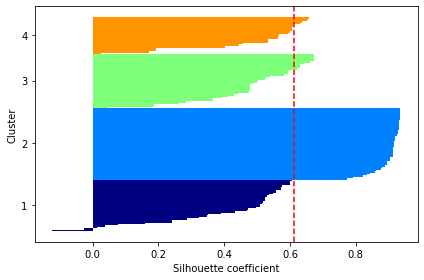

In [14]:
# Clustering
km = KMeans(n_clusters=4,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km=km.fit_predict(X)

# Evaluating silhouette coefficients
from sklearn.metrics import silhouette_samples

silhouette_vals=silhouette_samples(X,y_km,metric='euclidean')

# Ploting
from matplotlib import cm

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

# Ploting average of silhouette coefficients
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color="red",
           linestyle="--")

# Layout
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

### Clustering (DBSCAN)

In [15]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.2, min_samples = 4, metric = 'euclidean')

y_db_02_4 = db.fit_predict(X)
y_db_02_4 # 디비스캔에서 -1은 노이즈를 의미함.

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        2, -1,  2, -1,  1, -1, -1, -1,  1,  1,  2,  1,  3,  3, -1, -1, -1,
        1,  2,  1, -1,  1,  2, -1,  1,  1,  2, -1, -1, -1,  2,  1, -1,  2,
        2, -1,  1,  2,  2,  3,  1,  2,  2,  3,  1,  1,  2,  1],
      dtype=int64)

In [16]:
# Add the result(y_km) to Iris dstaset
Iris['y_db_02_4'] = y_db_02_4.tolist()
Iris

,sepal.length,sepal.width,petal.length,petal.width,variety,y_km,y_db_02_4
0,5.1,3.5,1.4,0.2,Setosa,2,0
1,4.9,3.0,1.4,0.2,Setosa,2,0
2,4.7,3.2,1.3,0.2,Setosa,2,0
3,4.6,3.1,1.5,0.2,Setosa,2,0
4,5.0,3.6,1.4,0.2,Setosa,2,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0,3
146,6.3,2.5,5.0,1.9,Virginica,0,1
147,6.5,3.0,5.2,2.0,Virginica,0,1
148,6.2,3.4,5.4,2.3,Virginica,0,2


<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

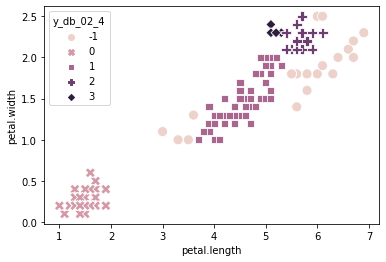

In [17]:
# Plot the results by the clusters
sns.scatterplot(x = 'petal.length', y = 'petal.width', hue = 'y_db_02_4', style = 'y_db_02_4', s = 100, data = Iris)

In [18]:
db = DBSCAN(eps = 0.5, min_samples = 4, metric = 'euclidean')
y_db_05_4 = db.fit_predict(X)
y_db_05_4 ## DB스캔에서 -1은 노이즈를 의미한다.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

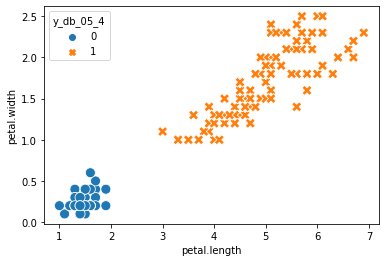

In [19]:
# Add the result(y_km) to Iris dstaset
Iris['y_db_05_4'] = y_db_05_4.tolist()
sns.scatterplot(x = 'petal.length', y = 'petal.width', hue = 'y_db_05_4', style = 'y_db_05_4', s = 100, data = Iris)

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

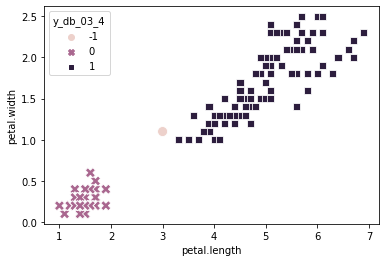

In [20]:
db = DBSCAN(eps = 0.3, min_samples = 4, metric = 'euclidean')
y_db_03_4 = db.fit_predict(X)
Iris['y_db_03_4'] = y_db_03_4.tolist()
sns.scatterplot(x = 'petal.length', y = 'petal.width', hue = 'y_db_03_4', style = 'y_db_03_4', s = 100, data = Iris)

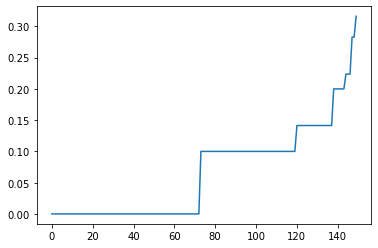

In [21]:
# k-nearest neighbor (k-distance plot)
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors = 4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

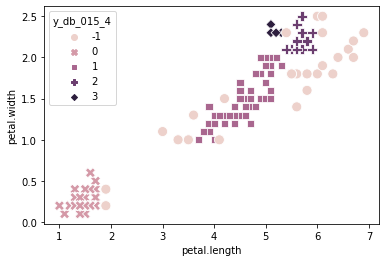

In [22]:
db = DBSCAN(eps = 0.15, min_samples = 4, metric = 'euclidean')
y_db_015_4 = db.fit_predict(X)
Iris['y_db_015_4'] = y_db_015_4.tolist()
sns.scatterplot(x = 'petal.length', y = 'petal.width', hue = 'y_db_015_4', style = 'y_db_015_4', s = 100, data = Iris)

# DBSCAN은 이 데이터에는 별로 좋지 않다. 따라서 다른 방법을 써야 한다.

# An Example (Half-Moon Shaped)

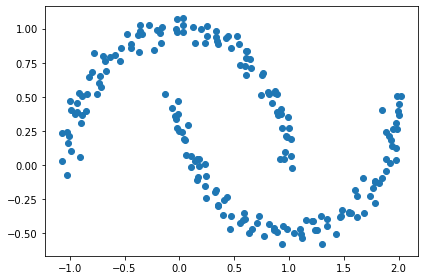

In [23]:
# Generating data
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

### K-means

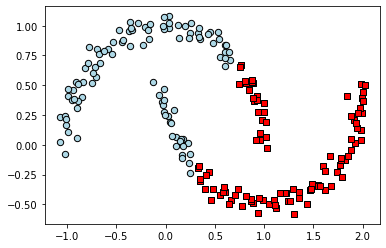

In [24]:
km = KMeans(n_clusters = 2, random_state = 0) # KMeans 클러스터 : 노이즈를 고려하지 않음

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0,0],
           X[y_km == 0,1],
           c = 'lightblue',
           edgecolor = 'black',
           marker = 'o',
           s = 40)

plt.scatter(X[y_km == 1, 0],
           X[y_km == 1, 1],
           c = 'red',
           edgecolor = 'black',
           marker = 's',
           s = 40)

### DBSCAN

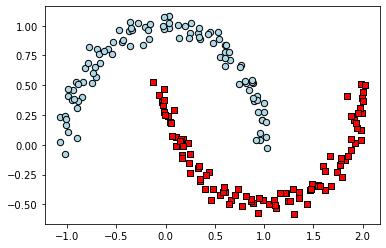

In [25]:
db = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')

y_db=db.fit_predict(X)

plt.scatter(X[y_db == 0,0],
           X[y_db == 0,1],
           c = 'lightblue',
           edgecolor = 'black',
           marker = 'o',
           s = 40)

plt.scatter(X[y_db == 1, 0],
           X[y_db == 1, 1],
           c = 'red',
           edgecolor = 'black',
           marker = 's',
           s = 40)

# Navigation Data

- How many percentages of car-owner are "car-dependent"?
- => How can the car-usage type be classified?

- Develop a machine learning model (K-means clustering) that classifies car-owners into a car-usege type using their vehicles' trajectory data (i.e. GPS data) for a month
- Use the following features:
--      (1)  The number of days for a month
--      (2)  The average travel time per trip
--      (3)  The average number of trips per day

### Data processing

In [27]:
Navi_path = 'D:/OneDrive - 연세대학교 (Yonsei University)/Lectures/2022-2_모빌리티데이터분석및활용/dataset/Navi_data.csv'

In [29]:
# Navigation data
Tdata = pd.read_csv(Navi_path)
Tdata

,ID,Date,Time,Longitude,Latitude,Speed
0,502915,20171209,122533,126.888421,37.510334,0.000000
1,502915,20171209,122635,126.888421,37.510334,0.000000
2,502915,20171209,122738,126.888874,37.510986,4.730095
3,502915,20171209,122943,126.886946,37.512514,6.924282
4,502915,20171209,123045,126.882310,37.514892,28.306628
...,...,...,...,...,...,...
1038365,3103978,20171222,235512,127.275210,38.087225,0.000000
1038366,3103978,20171222,235612,127.275210,38.087225,0.000000
1038367,3103978,20171222,235713,127.275210,38.087225,0.000000
1038368,3103978,20171222,235813,127.275210,38.087225,0.000000


In [30]:
##### [RECALL] Extracting trip information form trajectory data (see "03_Trajectory data analysis.ipynb" 참고)
#####  The follwoing function is the function of extracting trip information by combining the scripts of "03_Trajectory data analysis.ipynb" 

def Extract_veh_use(Veh_ID):
    MyT = Tdata[Tdata.ID == Veh_ID]
    
    # Create a variable representing "time of day" <== "Time" need to be modified.
    MyT['Time_hh'] = MyT.Time//10000
    MyT['Time_mm'] = (MyT.Time//100) - (MyT.Time_hh * 100)
    MyT['Time_ss'] = MyT.Time - (MyT.Time_hh*10000) - (MyT.Time_mm * 100)
    
    MyT['Time_H'] = MyT.Time_hh + (MyT.Time_mm/60) + (MyT.Time_ss/3600)

    # Set-up and initialization
    MyT['TripID'] = 0
    MyT['TripOD'] = 0

    MyT.TripID.iloc[0] = 1
    MyT.TripOD.iloc[0] = 'origin'
    MyT.TripOD.iloc[len(MyT) - 1] = 'destination'
    
    # Segmenting
    for n in range(1, len(MyT)):
        if MyT.Date.iloc[n] == MyT.Date.iloc[n-1]:
            if (MyT.Time_H.iloc[n] - MyT.Time_H.iloc[n-1])>0.1667:
                MyT.TripID.iloc[n] = MyT.TripID.iloc[n-1]+1
                MyT.TripOD.iloc[n] = "origin"
                MyT.TripOD.iloc[n-1] = "destination"
            else:
                MyT.TripID.iloc[n] = MyT.TripID.iloc[n-1]
        else:
            MyT.TripID.iloc[n] = 1
            MyT.TripOD.iloc[n] = "origin"
            MyT.TripOD.iloc[n-1] = "destination"
            
    # Create base data frame
    MyT_Trip = MyT.loc[:,['ID', 'Date', 'TripID']]

    MyT_Trip = MyT_Trip.drop_duplicates()

    # Create columns
    MyT_Trip['Longitude_O'] = 0
    MyT_Trip['Latitude_O'] = 0
    MyT_Trip['Time_H_O'] = 0

    MyT_Trip['Longitude_D'] = 0
    MyT_Trip['Latitude_D'] = 0
    MyT_Trip['Time_H_D'] = 0

    MyT_Trip['T_time'] = 0

    # Complete the table
    m = 0

    for n in range(0, len(MyT)):
        if (MyT.Date.iloc[n] == MyT_Trip.Date.iloc[m]) & (MyT.TripID.iloc[n] == MyT_Trip.TripID.iloc[m]):
            if MyT.TripOD.iloc[n] == "origin":
                MyT_Trip.Longitude_O.iloc[m] = MyT.Longitude.iloc[n]
                MyT_Trip.Latitude_O.iloc[m] = MyT.Latitude.iloc[n]
                MyT_Trip.Time_H_O.iloc[m] = MyT.Time_H.iloc[n]
            elif MyT.TripOD.iloc[n] == "destination":
                MyT_Trip.Longitude_D.iloc[m] = MyT.Longitude.iloc[n]
                MyT_Trip.Latitude_D.iloc[m] = MyT.Latitude.iloc[n]
                MyT_Trip.Time_H_D.iloc[m] = MyT.Time_H.iloc[n]

                MyT_Trip.T_time.iloc[m] = (MyT_Trip.Time_H_D.iloc[m]-MyT_Trip.Time_H_O.iloc[m]) * 60
                m = m+1
    
    # Eliminate noise
    MyT_Trip.drop(MyT_Trip.loc[MyT_Trip['Longitude_O'] == 0].index, inplace = True)
    MyT_Trip.drop(MyT_Trip.loc[MyT_Trip['Longitude_D'] == 0].index, inplace = True)
    MyT_Trip.drop(MyT_Trip.loc[MyT_Trip['T_time'] > 180].index, inplace = True)
    MyT_Trip.drop(MyT_Trip.loc[MyT_Trip['T_time'] < 5].index, inplace = True)
        
    # Extracting vehicle-based characteristics
    ### The number of days
    N_days = MyT_Trip.Date.unique().size
    ### The average travel time per trip
    Avg_time = MyT_Trip.T_time.mean()
    
    ### The average number of trips per day
    if N_days == 0:
        Avg_N_trips = 'NaN'
    else:
        Avg_N_trips = len(MyT_Trip)/N_days
    
    # DataFrame generation
    data = [[N_days, Avg_time, Avg_N_trips]]
    Veh_use = pd.DataFrame(data,columns = ['N_days', 'Avg_time' , 'Avg_N_trips'])
    
    
    return Veh_use

In [52]:
# Test
warnings.filterwarnings(action = 'ignore')
Extract_veh_use(2223549) 

,N_days,Avg_time,Avg_N_trips
0,20,44.660993,2.35


In [32]:
Veh_list=Tdata.ID.unique()
Veh_list

array([ 502915,  567810,  600415,  685330,  776983, 1347674, 1354799,
       1395688, 1418313, 1446805, 1538802, 1586316, 1618082, 1678779,
       1682265, 1708409, 1718991, 1754540, 1766694, 1768915, 1851141,
       1873223, 1894298, 1994596, 1998496, 2028833, 2036354, 2068708,
       2092962, 2094182, 2097253, 2107340, 2120334, 2127773, 2134592,
       2159863, 2180112, 2220702, 2220788, 2220948, 2220984, 2221027,
       2221068, 2221096, 2221159, 2221177, 2221188, 2221270, 2221299,
       2221321, 2221349, 2221418, 2221438, 2221487, 2221516, 2221532,
       2221590, 2221626, 2221628, 2221666, 2221716, 2221789, 2221800,
       2221823, 2221927, 2221941, 2222000, 2222149, 2222223, 2222226,
       2222230, 2222250, 2222311, 2222327, 2222450, 2222490, 2222512,
       2222550, 2222579, 2222610, 2222622, 2222640, 2222727, 2222872,
       2223020, 2223092, 2223109, 2223262, 2223289, 2223379, 2223422,
       2223444, 2223457, 2223511, 2223549, 2223624, 2223682, 2223702,
       2223991, 2224

In [33]:
Veh_list.size

216

In [53]:
# Entire vehicle

warnings.filterwarnings(action = 'ignore')

Veh_list=Tdata.ID.unique()


Veh_use_all = Extract_veh_use(Veh_list[0])

for a in range(1,Veh_list.size):
    Veh_use = Extract_veh_use(Veh_list[a])
    if Veh_use.N_days[0] != 0:
        Veh_use_all = pd.concat([Veh_use_all,Veh_use])


Veh_use_all

,N_days,Avg_time,Avg_N_trips
0,1,28.633333,2.000000
0,1,98.366667,2.000000
0,1,64.141667,2.000000
0,5,31.582051,2.600000
0,15,18.133333,2.066667
...,...,...,...
0,2,68.833333,2.500000
0,1,65.625000,2.000000
0,2,22.886667,2.500000
0,1,5.666667,1.000000


### Data exploration

<AxesSubplot:xlabel='Avg_N_trips', ylabel='Avg_time'>

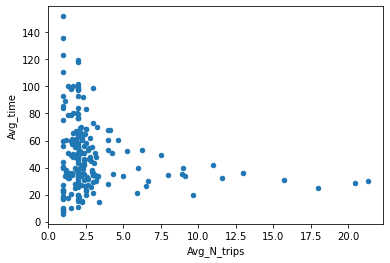

In [35]:
Veh_use_all.plot.scatter(x='Avg_N_trips', y='Avg_time')

<AxesSubplot:xlabel='N_days', ylabel='Avg_time'>

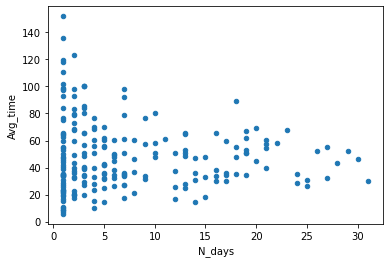

In [36]:
Veh_use_all.plot.scatter(x='N_days', y='Avg_time')

<AxesSubplot:xlabel='N_days', ylabel='Avg_N_trips'>

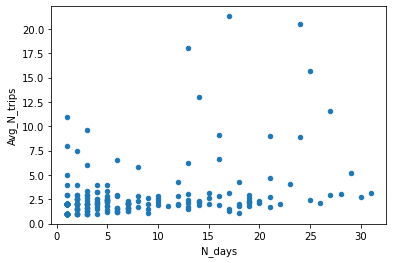

In [37]:
Veh_use_all.plot.scatter(x='N_days', y='Avg_N_trips')

### Elbow method
- Number of cluster = 1 to 10

C:\dev\Anaconda_3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


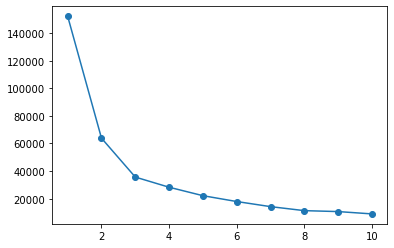

In [38]:
# Elbow method
X=Veh_use_all[['N_days', 'Avg_time' , 'Avg_N_trips']]
X

distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
               init='random',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
distortions


plt.plot(range(1,11), distortions, marker='o')

### Silhouette analysis

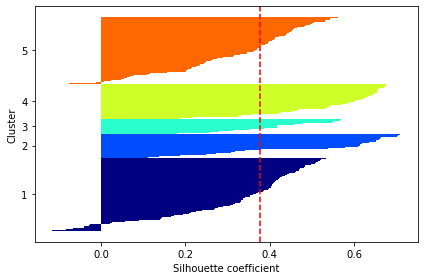

In [39]:
# Cluster = 5
km = KMeans(n_clusters=5,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km=km.fit_predict(X)

# Evaluating silhouette coefficients
from sklearn.metrics import silhouette_samples
silhouette_vals=silhouette_samples(X,y_km,metric='euclidean')

# Ploting
from matplotlib import cm
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

# Ploting average of silhouette coefficients
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color="red",
           linestyle="--")

# Layout
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

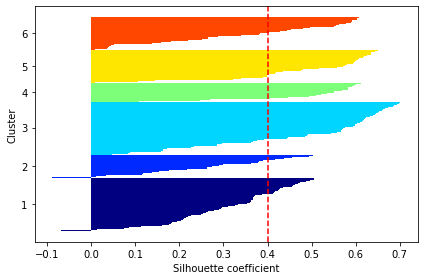

In [40]:
# Cluster = 6
km = KMeans(n_clusters=6,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km=km.fit_predict(X)

# Evaluating silhouette coefficients
from sklearn.metrics import silhouette_samples
silhouette_vals=silhouette_samples(X,y_km,metric='euclidean')

# Ploting
from matplotlib import cm
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

# Ploting average of silhouette coefficients
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color="red",
           linestyle="--")

# Layout
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

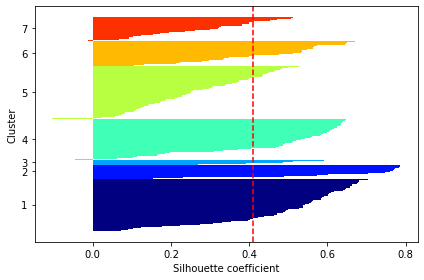

In [41]:
# Cluster = 7
km = KMeans(n_clusters=7,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km=km.fit_predict(X)

# Evaluating silhouette coefficients
from sklearn.metrics import silhouette_samples
silhouette_vals=silhouette_samples(X,y_km,metric='euclidean')

# Ploting
from matplotlib import cm
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

# Ploting average of silhouette coefficients
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color="red",
           linestyle="--")

# Layout
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

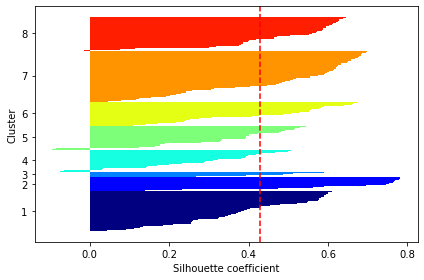

In [42]:
# Cluster = 8
km = KMeans(n_clusters=8,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km=km.fit_predict(X)

# Evaluating silhouette coefficients
from sklearn.metrics import silhouette_samples
silhouette_vals=silhouette_samples(X,y_km,metric='euclidean')

# Ploting
from matplotlib import cm
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

# Ploting average of silhouette coefficients
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color="red",
           linestyle="--")

# Layout
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

### Final model and interpretation
- Plot the data by cluster

In [43]:
# Cluster = 6
km = KMeans(n_clusters=6,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km=km.fit_predict(X)

X['y_km']=y_km.tolist()
X

,N_days,Avg_time,Avg_N_trips,y_km
0,1,28.633333,2.000000,2
0,1,98.366667,2.000000,3
0,1,64.141667,2.000000,5
0,5,31.582051,2.600000,2
0,15,18.133333,2.066667,4
...,...,...,...,...
0,2,68.833333,2.500000,5
0,1,65.625000,2.000000,5
0,2,22.886667,2.500000,4
0,1,5.666667,1.000000,4


In [44]:
# Average characteristics by cluster
Cluster_summary = X.groupby('y_km').mean()
Cluster_summary # 각 클러스터의 성격을 나타낸다. 

,N_days,Avg_time,Avg_N_trips
y_km,,,
0,10.230769,53.830899,2.429642
1,20.000000,33.966764,7.339677
2,3.923077,35.418841,2.594376
3,2.166667,107.294173,1.710317
4,3.606061,17.645074,2.087626
5,6.218750,72.967450,2.082596


In [45]:
# Market share
Cluster_freq = pd.pivot_table(X, values='N_days', index=['y_km'], aggfunc='count', margins=True)
Cluster_share = (Cluster_freq/Cluster_freq.loc['All'])*100 
Cluster_share # 일종의 마켓 셰어. 프로포션. 각 클러스터가 차지하는 비율이다. 이는 매우 중요하다. 

,N_days
y_km,
0,24.761905
1,10.952381
2,24.761905
3,8.571429
4,15.714286
5,15.238095
All,100.000000


<AxesSubplot:xlabel='N_days', ylabel='Avg_time'>

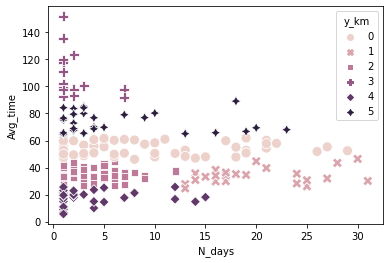

In [46]:
# Plot the results by the clusters
import seaborn as sns
sns.scatterplot(x = 'N_days', y = 'Avg_time', hue = 'y_km', style = 'y_km', s = 100, data = X)

<AxesSubplot:xlabel='Avg_N_trips', ylabel='Avg_time'>

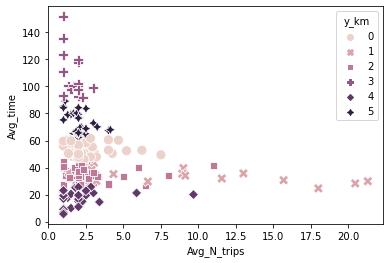

In [47]:
sns.scatterplot(x = 'Avg_N_trips', y = 'Avg_time', hue = 'y_km', style = 'y_km', s = 100, data = X)

<AxesSubplot:xlabel='Avg_N_trips', ylabel='N_days'>

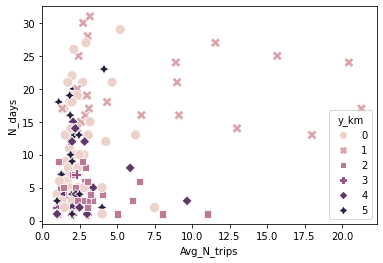

In [48]:
sns.scatterplot(x = 'Avg_N_trips', y = 'N_days', hue = 'y_km', style = 'y_km', s = 100, data = X)

### Application

#### There is a dataset of vehcle ID 1347674 ("Navi_data_single_veh.csv"). What type of driver is the owner of this vehicle?
* 머신러닝 관점에서, 우리는 어떤 것을 예측할 수 있다.

In [49]:
Tdata = pd.read_csv("Navi_data_single_veh.csv") 
Tdata

FileNotFoundError: [Errno 2] No such file or directory: 'Navi_data_single_veh.csv'

In [ ]:
X=Extract_veh_use(1347674)
X

In [ ]:
km.predict(X)

In [ ]:
print(km.predict(X))